# Digit classification using neural networks

# Setup

Files below have been downloaded from https://github.com/MichalDanielDobrzanski/DeepLearningPython35 
and saved in the same folder as this notebook.

In [2]:
# From Geron 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# Standard library
import random

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    

In [3]:
#included and changed to expand the mnist data
import gzip
import pickle

def load_data2():
    #changed the name of the file
    f = gzip.open('mnist_expanded.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

In [4]:
#included and changed to expand the mnist data
import pickle
import gzip
import numpy as np

def load_data_wrapper2():
    #changed to load_data2
    tr_d, va_d, te_d = load_data2()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

In [5]:
#included and changed to expand the mnist data
#included so load_data_wrapper2 can run
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# Load (and split) the MNIST dataset

In [6]:
import mnist_loader

#set different tuple variables
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

#set different 
training, validation, test = mnist_loader.load_data()

#seperates the data and labels
X_train, y_train = training[0], training[1]
X_test, y_test = test[0], test[1]

#casts to a list
training_data = list(training_data)
test_data= list(test_data)
validation_data = list(validation_data)

ModuleNotFoundError: No module named 'mnist_loader'

In [6]:
print(len(training_data))

50000


In [7]:
print(len(validation_data))

10000


In [8]:
print(len(test_data))

10000


# Visualize

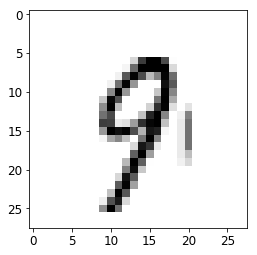

In [9]:
#select and display some digit from the dataset
import matplotlib
import matplotlib.pyplot as plt

#taking an images feature vector and reshaping it to a 28*28 pixel image 7201
some_digit_index = 7201
some_digit = training[0][some_digit_index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [10]:
X_train.shape

(50000, 784)

In [11]:
y_train.shape

(50000,)

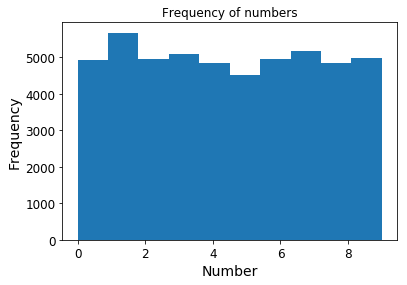

In [12]:
import matplotlib.pyplot as plt

#plots a graph of frequency for each number in the dataset
plt.hist(training[1])
plt.title("Frequency of numbers")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

# Set up a first network with three layers 

Input layer: 784 neurons<br>
Hidden layer: 30 neurons<br>
Output layer: 10 neurons

In [13]:
import network

#creating a network object (biases and weights are randomly initialized)
net1 = network.Network([784, 30, 10])

# Training the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [14]:
#number of epochs to train for
epochs = 30

#size of min_batch used when sampling
mini_batch_size = 10

#learning rate
eta = 3.0

net1.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

#OUTPUTS: The number of test images correctly recognized at each epoch of training
#PEAK: 94
#EPOCH29: 9439

Epoch 0 : 9061 / 10000
Epoch 1 : 9225 / 10000
Epoch 2 : 9332 / 10000
Epoch 3 : 9329 / 10000
Epoch 4 : 9293 / 10000
Epoch 5 : 9396 / 10000
Epoch 6 : 9376 / 10000
Epoch 7 : 9408 / 10000
Epoch 8 : 9402 / 10000
Epoch 9 : 9425 / 10000
Epoch 10 : 9413 / 10000
Epoch 11 : 9459 / 10000
Epoch 12 : 9437 / 10000
Epoch 13 : 9409 / 10000
Epoch 14 : 9451 / 10000
Epoch 15 : 9442 / 10000
Epoch 16 : 9451 / 10000
Epoch 17 : 9449 / 10000
Epoch 18 : 9417 / 10000
Epoch 19 : 9456 / 10000
Epoch 20 : 9449 / 10000
Epoch 21 : 9459 / 10000
Epoch 22 : 9430 / 10000
Epoch 23 : 9438 / 10000
Epoch 24 : 9454 / 10000
Epoch 25 : 9452 / 10000
Epoch 26 : 9451 / 10000
Epoch 27 : 9461 / 10000
Epoch 28 : 9455 / 10000
Epoch 29 : 9439 / 10000


# Seting up a second network with three layers 

Input layer: 784 neurons<br>
Hidden layer: 100 neurons<br>
Output layer: 10 neurons

In [15]:
import network

#creating a network object (biases and weights are randomly initialized)
net2 = network.Network([784, 100, 10])

# Training the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [16]:
epochs = 30
mini_batch_size = 10
eta = 3.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)
#PEAK: 86
#EPOCH29: 8685

Epoch 0 : 7493 / 10000
Epoch 1 : 8333 / 10000
Epoch 2 : 8407 / 10000
Epoch 3 : 8522 / 10000
Epoch 4 : 8553 / 10000
Epoch 5 : 8568 / 10000
Epoch 6 : 8591 / 10000
Epoch 7 : 8582 / 10000
Epoch 8 : 8620 / 10000
Epoch 9 : 8616 / 10000
Epoch 10 : 8597 / 10000
Epoch 11 : 8643 / 10000
Epoch 12 : 8648 / 10000
Epoch 13 : 8668 / 10000
Epoch 14 : 8657 / 10000
Epoch 15 : 8665 / 10000
Epoch 16 : 8647 / 10000
Epoch 17 : 8659 / 10000
Epoch 18 : 8659 / 10000
Epoch 19 : 8666 / 10000
Epoch 20 : 8674 / 10000
Epoch 21 : 8666 / 10000
Epoch 22 : 8664 / 10000
Epoch 23 : 8678 / 10000
Epoch 24 : 8684 / 10000
Epoch 25 : 8680 / 10000
Epoch 26 : 8676 / 10000
Epoch 27 : 8675 / 10000
Epoch 28 : 8692 / 10000
Epoch 29 : 8685 / 10000


# Seting up a third network with only two layers 

Input layer: 784 neurons<br>
Output layer: 10 neurons

In [17]:
import network

#creating a network object (biases and weights are randomly initialized)
net3 = network.Network([784, 10])

# Training the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [18]:
epochs = 30
mini_batch_size = 10
eta = 3.0
net3.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)
#PEAK: 91
#EPOCH29: 9156

Epoch 0 : 4851 / 10000
Epoch 1 : 4906 / 10000
Epoch 2 : 4974 / 10000
Epoch 3 : 5825 / 10000
Epoch 4 : 5908 / 10000
Epoch 5 : 5897 / 10000
Epoch 6 : 6716 / 10000
Epoch 7 : 6743 / 10000
Epoch 8 : 6777 / 10000
Epoch 9 : 6807 / 10000
Epoch 10 : 6827 / 10000
Epoch 11 : 7689 / 10000
Epoch 12 : 8570 / 10000
Epoch 13 : 9021 / 10000
Epoch 14 : 9116 / 10000
Epoch 15 : 9138 / 10000
Epoch 16 : 9145 / 10000
Epoch 17 : 9143 / 10000
Epoch 18 : 9168 / 10000
Epoch 19 : 9163 / 10000
Epoch 20 : 9161 / 10000
Epoch 21 : 9141 / 10000
Epoch 22 : 9173 / 10000
Epoch 23 : 9161 / 10000
Epoch 24 : 9134 / 10000
Epoch 25 : 9151 / 10000
Epoch 26 : 9168 / 10000
Epoch 27 : 9165 / 10000
Epoch 28 : 9159 / 10000
Epoch 29 : 9156 / 10000


# Classification using a built-in neural network from scikit-learn

In [ ]:
#SCALED OUTPUT: training set score: 0.930360
#               Test set score: 0.923300

'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)'''

In [ ]:
'''X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

In [15]:
from sklearn.neural_network import MLPClassifier

#creates a multi layer perceptron classifier
net4 = MLPClassifier(hidden_layer_sizes=100,
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='sgd',
                     activation='logistic')
net4.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
print("training set score: %f" % net4.score(X_train, y_train))
print("Test set score: %f" % net4.score(X_test, y_test))
#OUTPUT: training set score: 0.987060
#        Test set score: 0.972800

training set score: 0.990620
Test set score: 0.971700


In [17]:
#gets the predictions to make a confusion matrix
prediction=net4.predict(X_test)

In [1]:
X_test

NameError: name 'X_test' is not defined

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

#confusion matrix to table prediction vs actual
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[ 963    0    1    1    1    1    6    0    2    5]
 [   1 1124    2    2    0    1    1    1    3    0]
 [   6    8  970   10    2    1    5   17   11    2]
 [   1    1    2  976    0    1    0    7    9   13]
 [   0    0    3    0  947    0    2    2    2   26]
 [   3    1    0   16    1  850    7    2    6    6]
 [   3    5    1    1    3    6  935    1    3    0]
 [   1    2    2    1    0    0    0 1008    2   12]
 [   3    0    1    4    2    2    0    5  955    2]
 [   0    3    0    5    4    1    1    5    1  989]]


Saving figure confusion_matrix_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\classification\\confusion_matrix_plot.png'

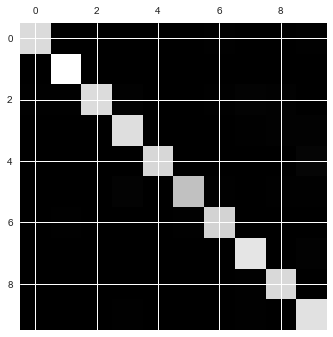

In [33]:
#outputs an image representation of a confusion matrix. A diagonal would mean a decent result
plt.matshow(conf_matrix, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [20]:
#displays the main classification metrics
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       980
          1       0.98      0.99      0.99      1135
          2       0.99      0.94      0.96      1032
          3       0.96      0.97      0.96      1010
          4       0.99      0.96      0.98       982
          5       0.98      0.95      0.97       892
          6       0.98      0.98      0.98       958
          7       0.96      0.98      0.97      1028
          8       0.96      0.98      0.97       974
          9       0.94      0.98      0.96      1009

avg / total       0.97      0.97      0.97     10000



In [21]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(net4, X_train, y_train)

C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

In [25]:
train_scores_mean = abs(train_scores.mean(axis=1))
test_scores_mean = abs(test_scores.mean(axis=1))

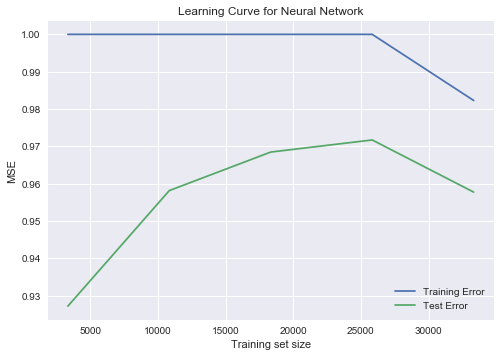

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Test Error')

plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning Curve for Neural Network')
plt.legend()

In [27]:
train_scores

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 0.97332813,  0.99126939,  0.98223876]])

In [28]:
epochs

30

# Another attempt 

In [15]:
from sklearn.neural_network import MLPClassifier

net5 = MLPClassifier(hidden_layer_sizes=100,
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='sgd',
                     activation='logistic',
                     early_stopping=True,
                     verbose=True)
net5.fit(X_train, y_train)

Iteration 1, loss = 0.26234170
Validation score: 0.955200
Iteration 2, loss = 0.13480525
Validation score: 0.965600
Iteration 3, loss = 0.10765889
Validation score: 0.968600
Iteration 4, loss = 0.09063245
Validation score: 0.963000
Iteration 5, loss = 0.07882299
Validation score: 0.966400
Iteration 6, loss = 0.07299124
Validation score: 0.967600
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [16]:
print("training set score: %f" % net5.score(X_train, y_train))
print("Test set score: %f" % net5.score(X_test, y_test))

#OUTPUT: training set score: 0.979400
#        Test set score: 0.970700

training set score: 0.979400
Test set score: 0.970700


#  Another Attempt

In [17]:
from sklearn.neural_network import MLPClassifier

net6 = MLPClassifier(hidden_layer_sizes=100,
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='lbfgs',
                     activation='logistic',
                     verbose=True)
net6.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [18]:
print("training set score: %f" % net6.score(X_train, y_train))
print("Test set score: %f" % net6.score(X_test, y_test))

#training set score: 0.921500
#Test set score: 0.922000

training set score: 0.921500
Test set score: 0.922000


#  Another Attempt

In [19]:
from sklearn.neural_network import MLPClassifier

net7 = MLPClassifier(hidden_layer_sizes=100,
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='adam',
                     activation='logistic',
                     verbose=True)
net7.fit(X_train, y_train)

Iteration 1, loss = 2.70397700
Iteration 2, loss = 2.81208699
Iteration 3, loss = 2.84167869
Iteration 4, loss = 2.54620391
Iteration 5, loss = 2.42217571
Iteration 6, loss = 2.44375675
Iteration 7, loss = 2.49057223
Iteration 8, loss = 2.40616390
Iteration 9, loss = 2.54063380
Iteration 10, loss = 2.39808960
Iteration 11, loss = 2.43364916
Iteration 12, loss = 2.67436744
Iteration 13, loss = 2.93265158
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [20]:
print("training set score: %f" % net7.score(X_train, y_train))
print("Test set score: %f" % net7.score(X_test, y_test))
#training set score: 0.703640
#Test set score: 0.711100

training set score: 0.691760
Test set score: 0.691500


#  Another Attempt

In [21]:
from sklearn.neural_network import MLPClassifier

net8 = MLPClassifier(hidden_layer_sizes=100,
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='sgd',
                     activation='logistic',
                     early_stopping=True,
                     warm_start=True,
                     verbose=True)
net8.fit(X_train, y_train)

Iteration 1, loss = 0.26061545
Validation score: 0.952400
Iteration 2, loss = 0.13322874
Validation score: 0.960600
Iteration 3, loss = 0.10264690
Validation score: 0.965000
Iteration 4, loss = 0.09250281
Validation score: 0.964200
Iteration 5, loss = 0.08260456
Validation score: 0.969000
Iteration 6, loss = 0.07562543
Validation score: 0.965000
Iteration 7, loss = 0.06728011
Validation score: 0.967800
Iteration 8, loss = 0.06297411
Validation score: 0.968800
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=True)

In [22]:
print("training set score: %f" % net8.score(X_train, y_train))
print("Test set score: %f" % net8.score(X_test, y_test))
#training set score: 0.986240
#Test set score: 0.972100

training set score: 0.986240
Test set score: 0.972100


#  Another Attempt

In [25]:
from sklearn.neural_network import MLPClassifier

net9 = MLPClassifier(hidden_layer_sizes=(400),
                     max_iter=30,
                     batch_size=10,
                     learning_rate_init=0.1,
                     solver='sgd',
                     activation='logistic',
                     early_stopping=True,
                     warm_start=True,
                     alpha=0.0001,
                     verbose=True)
net9.fit(X_train, y_train)

Iteration 1, loss = 0.29292430
Validation score: 0.957000
Iteration 2, loss = 0.12811752
Validation score: 0.965000
Iteration 3, loss = 0.09967185
Validation score: 0.970400
Iteration 4, loss = 0.08256600
Validation score: 0.969200
Iteration 5, loss = 0.07254648
Validation score: 0.970400
Iteration 6, loss = 0.06353922
Validation score: 0.974200
Iteration 7, loss = 0.05590136
Validation score: 0.972000
Iteration 8, loss = 0.05156815
Validation score: 0.976000
Iteration 9, loss = 0.04721020
Validation score: 0.974600
Iteration 10, loss = 0.04290990
Validation score: 0.975800
Iteration 11, loss = 0.04065139
Validation score: 0.975400
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=400, learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=True)

In [28]:
print("training set score: %f" % net9.score(X_train, y_train))
print("Test set score: %f" % net9.score(X_test, y_test))
#training set score: 0.993240
#Test set score: 0.974400

training set score: 0.993240
Test set score: 0.974400


In [29]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(net9, X_train, y_train)

NameError: name 'net9' is not defined

In [ ]:
'''
train_scores_mean = abs(train_scores.mean(axis=1))
test_scores_mean = abs(test_scores.mean(axis=1))
'''

In [ ]:
'''import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Test Error')

plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning Curve for Neural Network')
plt.legend()'''

In [30]:
'''from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
fig, subaxes = plt.subplots(3,1,figsize=(6,18))
plot_class_regions_for_classifier_subplot(net9, X_train, y_train, X_test, y_test, title, axis)'''

ModuleNotFoundError: No module named 'adspy_shared_utilities'

#  Best solution

# Expanded MNIST

In [9]:
import mnist_loader

#I ran the python script (expanded_mnist.py) first to get the expanded data
#I needed to adjust the given code for load_data_wrapper and load_data (shown above)
expanded_training_data, expanded_validation_data, expanded_test_data = load_data_wrapper2()
expanded_training_data = list(expanded_training_data)

In [10]:
print(len(expanded_training_data))

250000


In [11]:
import network

#creating a network object (biases and weights are randomly initialized)
net10 = network.Network([784, 100, 10])

In [12]:
#believe it or not these were the best hyperparameters I came up with
epochs = 30
mini_batch_size = 10
eta = 3.0
net10.SGD(expanded_training_data, epochs, mini_batch_size, eta, test_data=test_data)
#PEAK: 9800
#EPOCH29: 9790

Epoch 0 : 7740 / 10000
Epoch 1 : 7819 / 10000
Epoch 2 : 8764 / 10000
Epoch 3 : 8770 / 10000
Epoch 4 : 8805 / 10000
Epoch 5 : 8839 / 10000
Epoch 6 : 9723 / 10000
Epoch 7 : 9739 / 10000
Epoch 8 : 9743 / 10000
Epoch 9 : 9774 / 10000
Epoch 10 : 9767 / 10000
Epoch 11 : 9747 / 10000
Epoch 12 : 9752 / 10000
Epoch 13 : 9753 / 10000
Epoch 14 : 9778 / 10000
Epoch 15 : 9773 / 10000
Epoch 16 : 9798 / 10000
Epoch 17 : 9774 / 10000
Epoch 18 : 9781 / 10000
Epoch 19 : 9794 / 10000
Epoch 20 : 9791 / 10000
Epoch 21 : 9796 / 10000
Epoch 22 : 9786 / 10000
Epoch 23 : 9775 / 10000
Epoch 24 : 9798 / 10000
Epoch 25 : 9800 / 10000
Epoch 26 : 9785 / 10000
Epoch 27 : 9793 / 10000
Epoch 28 : 9799 / 10000
Epoch 29 : 9790 / 10000


## Use a separate notebook